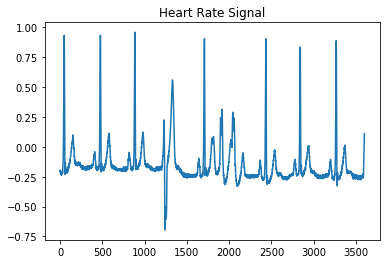

In [5]:
from scipy import fft
from scipy import ifft
from scipy.signal import butter
from scipy.signal import buttord
from scipy.signal import lfilter
from scipy.signal import bessel
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("a4.csv") #Read data from CSV datafile,others are a1.csv,a2.csv,a4.csv
def notchfilter(dataset):
    """ Filters the data using notch filter
        Description:
            Digital filter which returns the filtered signal using 60Hz
            notch filter. Transforms the signal into frequency domain
            using the fft function of the Scipy Module. Then, suppresses
            the 60Hz signal by equating it to zero. Finally, transforms
            the signal back to time domain using the ifft function.
        Input:
            ECGdata -- list of integers (ECG data)
        Output:
            ifft(fftECG) -- inverse fast fourier transformed array of filtered ECG data
    """         
    fftECG = fft(dataset)
    for i in range(len(fftECG)):
        if 590<i<620 or 880<i<910: fftECG[i]=0
    return ifft(fftECG)


plt.title("Heart Rate Signal") #The title of our plot
plt.plot(dataset.hart) #Draw the plot object
plt.show() #Display the plot

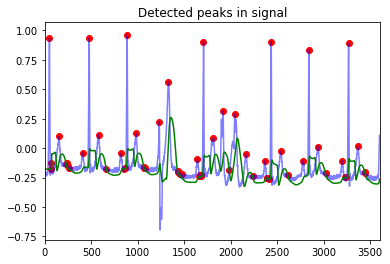

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#Calculate moving average with 0.75s in both directions, then append do dataset
hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 100 #The example dataset was recorded at 100Hz
mov_avg = dataset['hart'].rolling(int(hrw*fs)).mean() #Calculate moving average
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(dataset.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
dataset['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe
#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns
for datapoint in dataset.hart:
    rollingmean = dataset.hart_rollingmean[listpos] #Get local mean
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1
ybeat = [dataset.hart[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
plt.title("Detected peaks in signal")
plt.xlim(0,3600)
plt.plot(dataset.hart, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.plot(mov_avg, color ='green') #Plot moving average
plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
plt.show()


In [7]:
RR_list = []
cnt = 0
while (cnt < (len(peaklist)-1)):
    RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
    ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1
bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
print ("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Average Heart Beat is: 111.3
